In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import numpy as np
import dateutil
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [5]:
# Import data

fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_filt = pd.read_csv(r'..\data\processed\filtered_raw_data.csv', index_col=0)
fr_norm = pd.read_csv(r'..\data\processed\run_1_median_linregress_normalized_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_groupings.csv')

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

### Before LDA can be applied, data must pass a few assumptions:

1. Data is gaussian--every variable is shaped like a bell curve when plotted
2. Each "attribute" has the same variance, i.e. that the values of each variable vary around the mean by the same amount on average 

<AxesSubplot:>

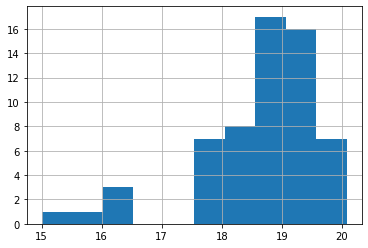

In [50]:
# Get some data and look at histograms:
# Generally they look non-normal
data = fr_raw[fr_quant_filenames_in_analytical_order]
np.log2(data).iloc[411].hist()

Text(0.5, 0, 'p-values per feature')

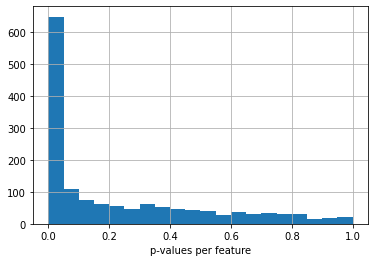

In [85]:
data = np.log2(fr_raw[fr_quant_filenames_in_analytical_order])
data['norm_test_pval'] = data.apply(stats.normaltest, axis=1)

data['norm_test_pval'].str[1].hist(bins=20)

plt.xlabel('p-values per feature')

scipy.stats.normaltest gives a p-value that your data were sampled from a normal distribuion. 

If p-val < 0.05, then it likely DID NOT come from a normal distribution. 

Plotting the distribution of p-values for each feature, the histogram peak at 0.05 in my data suggests that most features did not come from a normal distribution. Which makes using LDA rather difficult because it doesn't pass the critical first assumption. 

### For this reason, I won't attempt to do LDA for now. PCA doesn't seem to have this same limitation on assumptions, so PCA still is appropriate. 

Text(0.5, 0, 'p-values per feature')

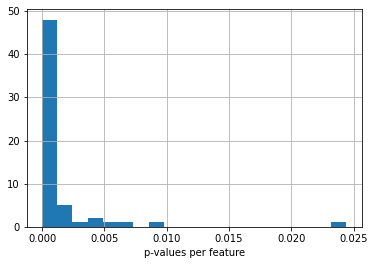

In [96]:
data = np.log2(fr_raw[fr_quant_filenames_in_analytical_order]).T
data['norm_test_pval'] = data.apply(stats.normaltest, axis=1)

data['norm_test_pval'].str[1].hist(bins=20)

plt.xlabel('p-values per feature')

NormaltestResult(statistic=55.36206938238227, pvalue=9.512165113991444e-13)

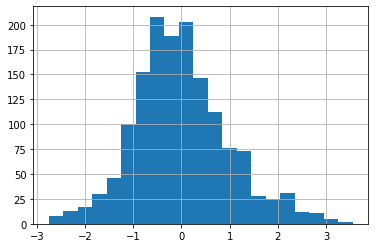

In [212]:
data = np.log2(fr_raw[fr_quant_filenames_in_analytical_order])

data = data.iloc[:, 0]

((data - data.mean())/data.std()).hist(bins=21)
stats.normaltest((data - data.mean())/data.std())

### Even though the above histogram looks normal, the normaltest p-value is still <<<< 0.05, so it's definitely not from a normal distribution

### Even after z-scoring the data, the stats.normaltest() still returns the same p-value, so it seems that stats does a z-normalization under the hood on your raw data

In [115]:
stats.normaltest(data.iloc[:, 0])

NormaltestResult(statistic=55.362069382382586, pvalue=9.512165113989972e-13)

In [193]:
stats.normaltest(np.random.normal(size=1000))

NormaltestResult(statistic=0.9334255817373001, pvalue=0.6270601619564631)

(array([  3.,  21.,  82., 186., 260., 247., 138.,  51.,  10.,   2.]),
 array([-3.44698738, -2.72878758, -2.01058778, -1.29238797, -0.57418817,
         0.14401164,  0.86221144,  1.58041124,  2.29861105,  3.01681085,
         3.73501065]),
 <BarContainer object of 10 artists>)

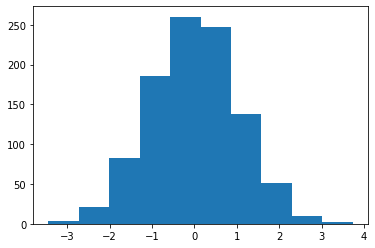

In [211]:
plt.hist(np.random.normal(size=1000))